In [1]:
import pandas as pd
df = pd.DataFrame({'A': [0.3510,2.1812,0.2415,-.1096,.1544], 
                   'B': [1.1796, 2.1068, 1.7753, 1.2747, 2.0851],
                   'C': [-0.9852, 1.3766, -1.3244, -.6316,-.8320],
                   'y': [0.2758, 1.4392, -.4611, .6154, 1.0006]})
df.head()

,A,B,C,y
0,0.3510,1.1796,-0.9852,0.2758
1,2.1812,2.1068,1.3766,1.4392
2,0.2415,1.7753,-1.3244,-0.4611
3,-0.1096,1.2747,-0.6316,0.6154
4,0.1544,2.0851,-0.8320,1.0006


In [3]:

df.corr()


,A,B,C,y
A,1.000000,0.540770,0.923239,0.598772
B,0.540770,1.000000,0.471446,0.453692
C,0.923239,0.471446,1.000000,0.800892
y,0.598772,0.453692,0.800892,1.000000


In [4]:
#A,C and y are HIGHLY correalted to one -> select A,C: Feature 1,3

In [8]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
X = np.array([[-10],[-8],[-3],[-1], [2], [7]])
y = np.array([[4.18], [2.42], [0.22], [.12], [.25], [3.09]])

w_train = []
for order in range(1,7):
    poly = PolynomialFeatures(order)
    P = poly.fit_transform(X)
    w = inv(P.T@P)@P.T@y
    w_train.append(w)

X_test = np.array([[-9], [-7], [-5], [-4], [-2], [1], [4], [5], [6], [9]])
y_test = np.array([[3], [1.81], [0.80], [0.25], [-0.19], [0.4], [1.24], [1.68], [2.32], [5.05]])
y_predictions = []
mean_squared_error_list = []
for order in range(1,7):
    poly = PolynomialFeatures(order)
    P = poly.fit_transform(X_test)
    y_pred = P@w_train[order-1]
    y_predictions.append(y_pred)
    mean_squared_error_list.append(mean_squared_error(y_test, y_pred))   




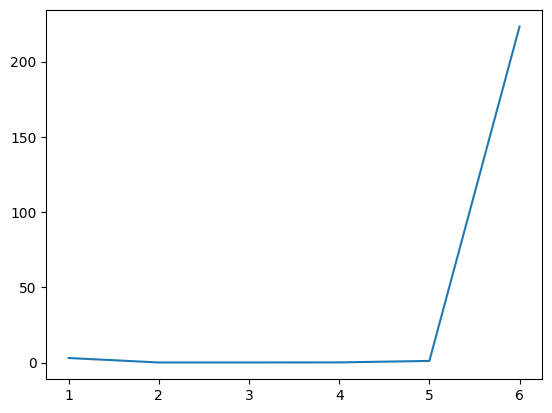

In [10]:
plt.plot(range(1,7), mean_squared_error_list)
plt.show()

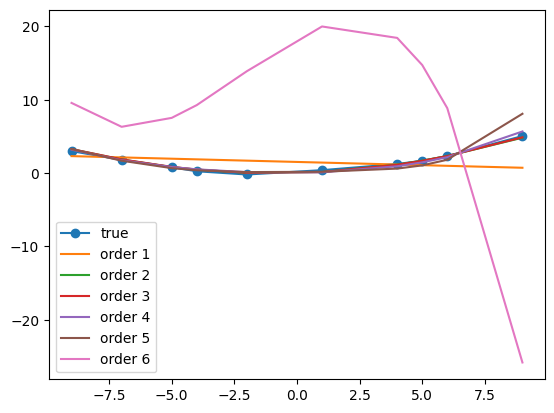

In [14]:
plt.plot(X_test,y_test, label='true', marker='o')
for order in range(1,7):
    plt.plot(X_test, y_predictions[order-1], label='order '+str(order))
plt.legend()
plt.show()

In [24]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
X = np.array([[-10],[-8],[-3],[-1], [2], [7]])
y = np.array([[4.18], [2.42], [0.22], [.12], [.25], [3.09]])

w_train = []
poly_objects = []
for order in range(1,7):
    poly = PolynomialFeatures(order)
    P = poly.fit_transform(X)
    m = len(P)
    d = len(P[0])
    #primal form ridge regression
    if m > d: #primal form
        w = inv(P.T@P + 1*np.eye(P.shape[1]))@P.T@y
    else: #dual
        w = P.T@inv(P@P.T + 1*np.eye(P.shape[0]))@y
    w_train.append(w)
    poly_objects.append(poly)

X_test = np.array([[-9], [-7], [-5], [-4], [-2], [1], [4], [5], [6], [9]])
y_test = np.array([[3], [1.81], [0.80], [0.25], [-0.19], [0.4], [1.24], [1.68], [2.32], [5.05]])
y_predictions = []
mean_squared_error_list = []
for order in range(1,7):
    poly = poly_objects[order-1]    
    P = poly.fit_transform(X_test)
    m = len(P)
    d = len(P[0])
    y_pred = P@w_train[order-1]
    y_predictions.append(y_pred)
    mean_squared_error_list.append(mean_squared_error(y_test, y_pred))   



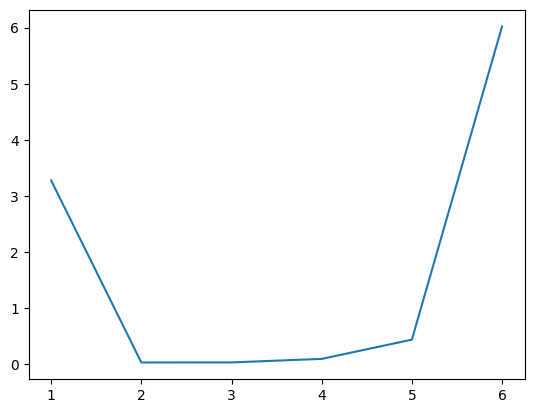

In [25]:
plt.plot(range(1,7), mean_squared_error_list)
plt.show()

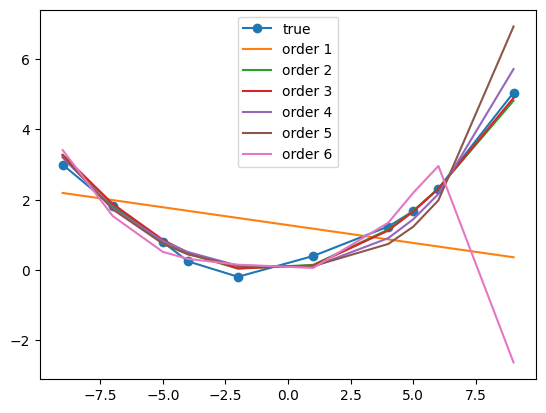

In [26]:
plt.plot(X_test,y_test, label='true', marker='o')
for order in range(1,7):
    plt.plot(X_test, y_predictions[order-1], label='order '+str(order))
plt.legend()
plt.show()